###Basic Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,roc_curve, auc, classification_report

### Data Loading and Preprocessing

In [2]:
#mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
#loading dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/AIMLDS datasets/MonkeyPox.csv')
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,1,0,1,1,1,0,1,0,0,0
1,2,1,0,1,1,0,0,1,0,1
2,2,0,1,1,0,0,0,1,0,1
3,1,1,0,0,0,1,1,1,0,1
4,3,1,1,1,0,0,1,1,0,1


In [7]:
df.shape

(25000, 10)

In [8]:
df.isna().sum()

Systemic Illness                  0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64

In [9]:
df.describe()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000.000000,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,2.493440,0.493800,0.502160,0.50448,0.49944,0.501080,0.501320,0.503360,0.497840,0.636360
std,1.113232,0.499972,0.500005,0.49999,0.50001,0.500009,0.500008,0.499999,0.500005,0.481056
min,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Systemic Illness                25000 non-null  int64
 1   Rectal Pain                     25000 non-null  int64
 2   Sore Throat                     25000 non-null  int64
 3   Penile Oedema                   25000 non-null  int64
 4   Oral Lesions                    25000 non-null  int64
 5   Solitary Lesion                 25000 non-null  int64
 6   Swollen Tonsils                 25000 non-null  int64
 7   HIV Infection                   25000 non-null  int64
 8   Sexually Transmitted Infection  25000 non-null  int64
 9   MonkeyPox                       25000 non-null  int64
dtypes: int64(10)
memory usage: 1.9 MB


In [12]:
corr=df.corr()
corr


,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
Systemic Illness,1.000000,-0.005571,0.013249,-0.002319,0.017959,-0.000886,0.003142,0.006004,-0.006781,-0.010841
Rectal Pain,-0.005571,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,0.005764,0.000666,0.140727
Sore Throat,0.013249,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,0.000771,-0.001901,0.063385
Penile Oedema,-0.002319,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,0.003620,-0.005722,0.061905
Oral Lesions,0.017959,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,-0.012153,-0.002725,0.051955
Solitary Lesion,-0.000886,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,-0.002335,0.009849,0.037471
Swollen Tonsils,0.003142,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,-0.004258,-0.006469,0.013221
HIV Infection,0.006004,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,1.000000,0.001309,0.146192
Sexually Transmitted Infection,-0.006781,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,0.001309,1.000000,0.123376
MonkeyPox,-0.010841,0.140727,0.063385,0.061905,0.051955,0.037471,0.013221,0.146192,0.123376,1.000000


<Axes: >

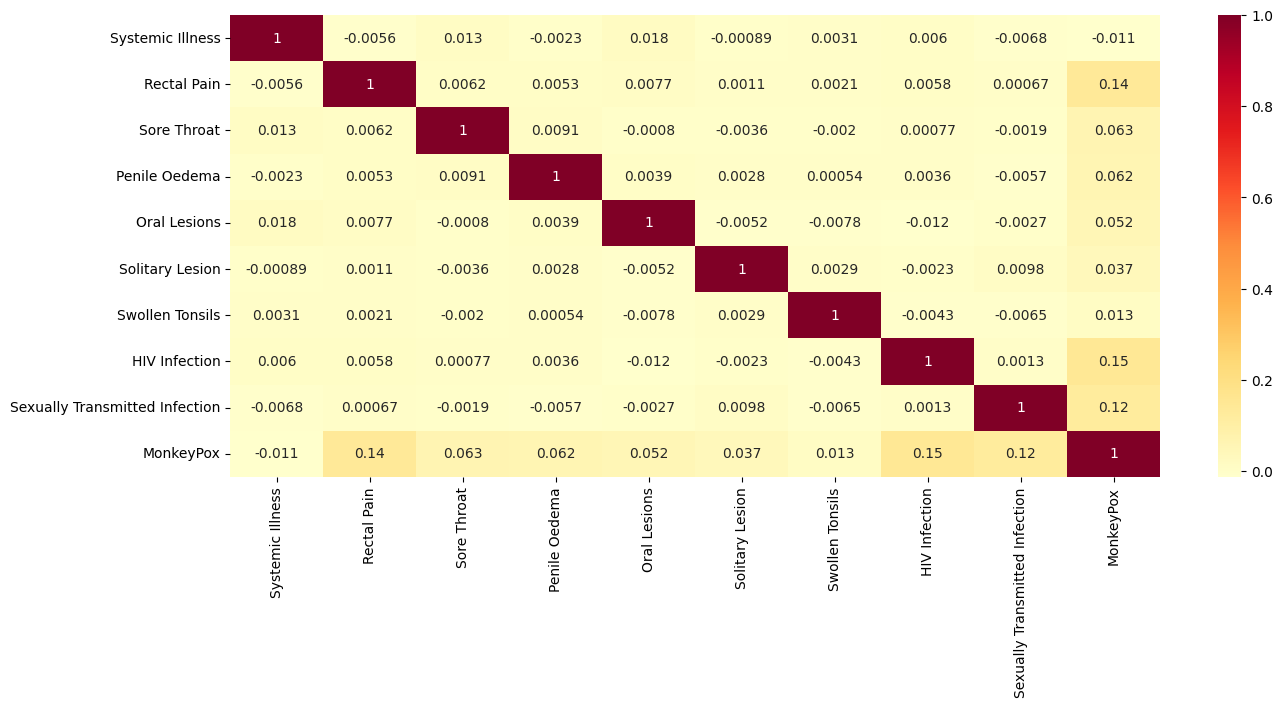

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='YlOrRd')

### Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train=df.drop(['MonkeyPox'], axis=1)
y_train=df['MonkeyPox']

x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.20)

In [17]:
print('Train Dataset Shape :',x_train.shape[0])
print('Test Dataset Shape :',y_train.shape[0])

Train Dataset Shape : 20000
Test Dataset Shape : 20000


### KNN Classfier model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

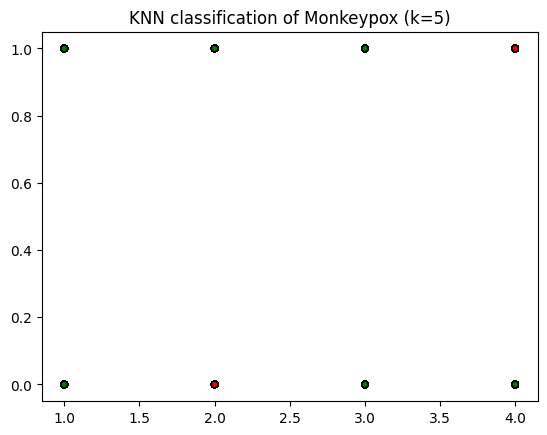

In [27]:
cmap = ListedColormap(['red', 'green'])
plt.figure()
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_pred.ravel(), cmap=cmap, edgecolor='k', s=20)
plt.title("KNN classification of Monkeypox (k=5)")
plt.show()

In [36]:
def evaluate_knn(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='binary')
  confusion_mat = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)
  return {'accuracy': accuracy, 'f1_score': f1, 'confusion_matrix': confusion_mat, 'class_report': class_report}

# Get evaluation results
results = evaluate_knn(y_test, y_pred)

# Print the results
print("Accuracy:", results['accuracy'])
print("F1-score:", results['f1_score'])
print("Confusion matrix:\n", results['confusion_matrix'])
print("Classification report:\n", results['class_report'])

Accuracy: 0.6394
F1-score: 0.7307749738688966
Confusion matrix:
 [[ 750 1101]
 [ 702 2447]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      0.41      0.45      1851
           1       0.69      0.78      0.73      3149

    accuracy                           0.64      5000
   macro avg       0.60      0.59      0.59      5000
weighted avg       0.63      0.64      0.63      5000



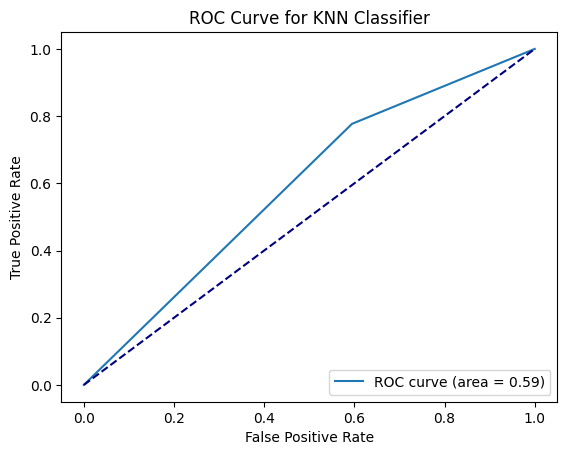

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier model

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
  'n_estimators': [10, 20, 50, 100],
  'max_depth': [3, 5, 10],
  'min_samples_split': [2, 5, 10],
}

random_forest = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter=10, cv=5)

random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

In [45]:
def evaluate_rf(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='binary')
  confusion_mat = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)
  return {'accuracy': accuracy, 'f1_score': f1, 'confusion_matrix': confusion_mat, 'class_report': class_report}

# Get evaluation results
results = evaluate_rf(y_test, y_pred)

# Print the results
print("Accuracy:", results['accuracy'])
print("F1-score:", results['f1_score'])
print("Confusion matrix:\n", results['confusion_matrix'])
print("Classification report:\n", results['class_report'])

Accuracy: 0.6778
F1-score: 0.774021601907701
Confusion matrix:
 [[ 630 1221]
 [ 390 2759]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.34      0.44      1851
           1       0.69      0.88      0.77      3149

    accuracy                           0.68      5000
   macro avg       0.66      0.61      0.61      5000
weighted avg       0.67      0.68      0.65      5000



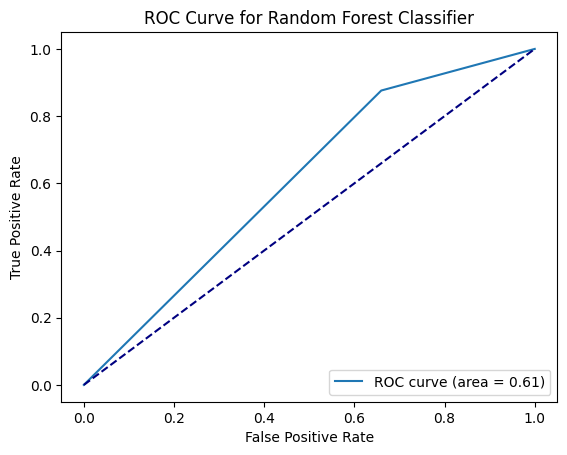

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

### Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier(max_depth=5)

dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

In [48]:
def evaluate_dct(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='binary')
  confusion_mat = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)
  return {'accuracy': accuracy, 'f1_score': f1, 'confusion_matrix': confusion_mat, 'class_report': class_report}

# Get evaluation results
results = evaluate_dct(y_test, y_pred)

# Print the results
print("Accuracy:", results['accuracy'])
print("F1-score:", results['f1_score'])
print("Confusion matrix:\n", results['confusion_matrix'])
print("Classification report:\n", results['class_report'])

Accuracy: 0.6778
F1-score: 0.774021601907701
Confusion matrix:
 [[ 630 1221]
 [ 390 2759]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.34      0.44      1851
           1       0.69      0.88      0.77      3149

    accuracy                           0.68      5000
   macro avg       0.66      0.61      0.61      5000
weighted avg       0.67      0.68      0.65      5000



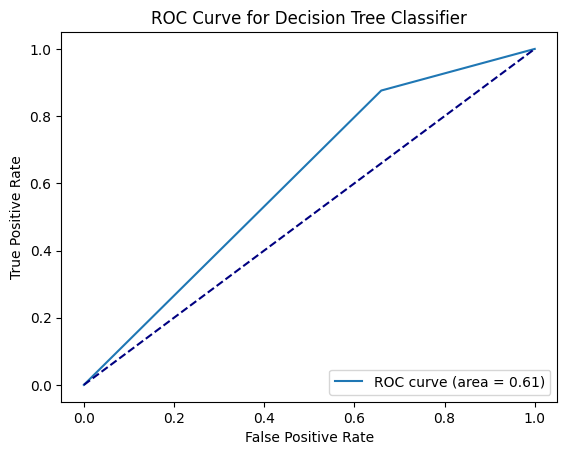

In [49]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()